# ANALISIS DE LOS SALARIOS EN PROGRAMADORES


Por: Wagner Fernández V.

## Introducción

<p style="text-align: justify;">Se crea el primer modelo de aprendizaje, de regresión lineal, para comparar y predecir un conjunto de datos, para este caso, se analizará la información de los salarios de los programadores conforme a los años de experiencia que tengan.</p>

<p style="text-align: justify;">El set de datos, se obtuvo de la plataforma Kaggle: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression?select=Salary_dataset.csv</p>

<p style="text-align: justify;">Lo primero que haremos será importar todas las bibliotecas con las que trabajaremos, tu ya tienes los conceptos básicos de numpy además que cuentas con una lectura adicional para tenerlos a la mano.</p>

<p style="text-align: justify;">El algoritmo, fue desarrollado en el lenguaje de programación Python, con las librerías Pandas, Matplotlib, y el paquete para Machine llamano Sckit-Learn; basado en el libro de (Roldán, 2022) y el libro de Géron (2019).</p>

## 1-Análisis y procesamiento de la data

1. Instalación de Librerías

<p style="text-align: justify;">Las APIs necesarias para el procesamiento de los datos.</p>

In [1]:
import pandas as pd # para procesar datos alfanumericos
import numpy as np# para procesar arreglos, expresiones numéricas y algebráicas.
import matplotlib.pyplot as plt # Para realizar graficos.
import os #Este modulo nos permite acceder a funcionalidades dependientes del Sistema Operativo. Sobre todo, aquellas que nos refieren información sobre el entorno del mismo y nos permiten manipular la estructura de directorios (para leer y escribir archivos.
import seaborn as sns# librería basada en matplotlib, para mostrar gráficas más elegantes.
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

2. Procesamiento de Datos

<p style="text-align: justify;">Este numeral, se desglosa en dos puntos:</p>

* Limpieza de datos
* Analisis exploratorio de datos (EDA) por sus siglas en inglés.

2.1. Limpieza de datos

<p style="text-align: justify;">La limpieza de los datos o Datacleaning,en involucrar detectar, eliminar,corregir o transformar cualquier anomalía, perturbación o irrelevancia de los datos. (Torres, 2021)</p>

Para este caso, se va utilizar el analisis descriptivo de datos, que es ... 

* Se procede con leer los datos, utilizando la librería pandas:

In [2]:
df = pd.read_csv('C:/Users/wagne/Downloads/Analisis salarios programadores/data/salario.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


* Se limpia la columna que no será tan relevante en el analisis de los datos a graficar, que en este caso es "Unnamed: 0" con el metodo drop de la librería Pandas.

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

* Se cambia los nombres de las columnas del DataFrame leído:

In [4]:
df.columns = ['años experiencia', 'salario']

* Comando para la lectura del DataFrame ya con los ajustes hechos:

In [5]:
df

,años experiencia,salario
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


2.2. Analisis Exploratorio de datos (EDA)

<p style="text-align: justify;">El análisis exploratorio de datos (EDA) es utilizado por los científicos de datos para analizar e investigar conjuntos de datos y resumir sus principales características, empleando a menudo métodos de visualización de datos. Ayuda a determinar la mejor manera de manipular los orígenes de datos para obtener las respuestas que necesita, lo que permite a los científicos de datos descubrir patrones, detectar anomalías, probar una hipótesis o comprobar supuestos. (IBM, 2021)</p>



* Descripcion del DataFrame, para ver todos sus componentes; incluyendo desde la mediana a la moda, aclarando que es el analisis de las dos columnas que tiene dicho DataFrame

In [6]:
df.describe()

,años experiencia,salario
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


* Conteo de casillas en las dos columnas del DataFrame:

In [7]:
# Conteo de Indices o filas con datos en el DataFrame
df.count()

años experiencia    30
salario             30
dtype: int64

* La información del DataFrame:

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   años experiencia  30 non-null     float64
 1   salario           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


3. Visualización de Datos

En un libro, leyendo su introducción se afirma que: _"A data visualization first and foremost has to accurately convey the data. It must not mislead or distort."_ [Una visualización de datos ante todo, tiene que transmitir con precisión los datos. No debe inducir a error ni distorsionar] (Wilke, 2019).

<p style="text-align: justify;">Reflexionando la frase anterior, la visualización de los datos es un proceso por medio del cual, se toman los datos ya procesados u organozados, para representarlos en gráficos, cuyas representaciones, deben mostrar variables concordantes para la buena toma de decisiones; como dicen por ahí "todo entra por los ojos." </p> 

* Graficar el DataFrame, para que a medida en que el valor incremente, el color se verá más intenso:

In [9]:
#colorear los valores del df segun su intensidad
# se declara la variable 
# se toman el df para colorearlo como se desee
tabla_colorida = sns.light_palette("green", as_cmap=True)
 
# visualizar el df
print("Representando el estilo del DataFrame:")
df.style.background_gradient(cmap=tabla_colorida).set_precision(0)#numero de decimales a agregar o quitar

Representando el estilo del DataFrame:


C:\Users\wagne\AppData\Local\Temp\ipykernel_6232\2419219102.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.style.background_gradient(cmap=tabla_colorida).set_precision(0)#numero de decimales a agregar o quitar


,años experiencia,salario
0,1,39344
1,1,46206
2,2,37732
3,2,43526
4,2,39892
5,3,56643
6,3,60151
7,3,54446
8,3,64446
9,4,57190


* Grafica de linea, para mostrar la tendencia de salarios conforme a la antiguedad de los programadores.

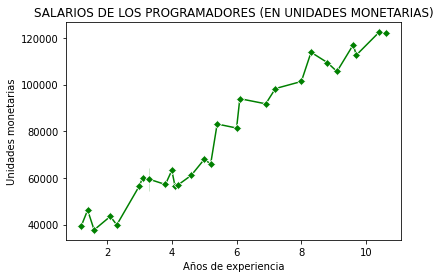

In [10]:
sns.lineplot(data=df, x="años experiencia", y="salario", color='green', marker = "D")
plt.title("SALARIOS DE LOS PROGRAMADORES (EN UNIDADES MONETARIAS)")
plt.xlabel("Años de experiencia")
plt.ylabel("Unidades monetarias")
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/lineplot.jpg')

4. Analisis estadístico

El análisis estadístico es la recopilación e interpretación de datos para descubrir patrones y tendencias. - (De TechTarget, 2021).

Para este caso, se utilizará el análisis descriptivo de los datos, que consiste en describir o conocer los datos, las tendencias claves en los mismos y observar las situaciones que conduzcan a nuevos hechos.

* Histograma, que se utiliza para representar la distribución de frecuencias de algunos puntos de datos de una variable.

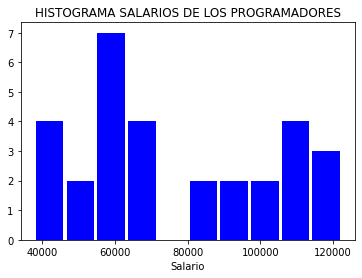

<Figure size 432x288 with 0 Axes>

In [11]:
#https://appgametutoriales.com/hacer-un-histograma-en-python/
plt.hist(df['salario'],color = "blue",rwidth=0.9) # se ponen a graficar el dataframe tomando como referencia los 
plt.title("HISTOGRAMA SALARIOS DE LOS PROGRAMADORES")
plt.xlabel("Salario")
plt.show()
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/histogram.jpg')

+ Media o promedio, se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. - (Estadística en Python: media, mediana, varianza, percentiles (Parte III), 2017)

In [12]:
#calculo de la media o promedio 
media=df["salario"].mean()

print("la media es:", media)


la media es: 76004.0


* Mediana, que viene el valor dentro del conjunto de datos que es menor que el 50% de los datos y mayor que el 50% restante.

In [13]:
#calculo de la mediana -https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii
mediana=df["salario"].median()

print("La mediana es:", mediana)

La mediana es: 65238.0


* La moda, que viende siendo el valor más repetido (solo aplicable a variables discretas).

In [14]:
#Calculo de la moda 
moda=df["salario"].mode()
print("La moda es:", moda)

La moda es: 0      37732.0
1      39344.0
2      39892.0
3      43526.0
4      46206.0
5      54446.0
6      55795.0
7      56643.0
8      56958.0
9      57082.0
10     57190.0
11     60151.0
12     61112.0
13     63219.0
14     64446.0
15     66030.0
16     67939.0
17     81364.0
18     83089.0
19     91739.0
20     93941.0
21     98274.0
22    101303.0
23    105583.0
24    109432.0
25    112636.0
26    113813.0
27    116970.0
28    121873.0
29    122392.0
Name: salario, dtype: float64


* Los percentiles y cuantiles, viene siendo igual al de mediana, salvo que aquí la división ya no es en el 50%. 

In [15]:
p90 = df["salario"].quantile(0.9)
print("El cuartil y percentil es: ", p90)

#El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%. 
#El 25% de las observaciones es menor que el primer cuartil. 
#Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje.

El cuartil y percentil es:  114128.70000000001


* La linea asimetrica, tiene una pendiente negativa, conforme a los valores registrados en los datos.

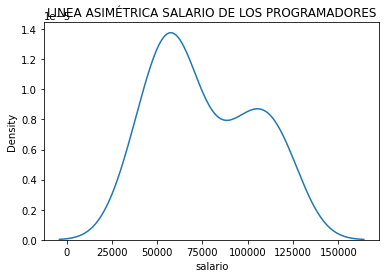

In [16]:
#DENSIDAD DE PROBABILIDAD
sns.kdeplot(
    data= df,
    x='salario'#VARIABLE   
)

plt.title('LINEA ASIMÉTRICA SALARIO DE LOS PROGRAMADORES')
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/asymmetry.jpg')

* Se muestra una representacxión grafica de la asimetría, en el fondo se puede evidenciar la agrupación de los datos.

c:\Users\wagne\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


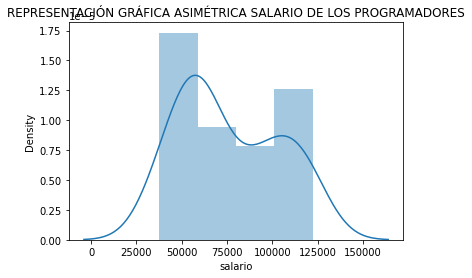

In [17]:
#Representación gráfica de la asimetría
plt.title('REPRESENTACIÓN GRÁFICA ASIMÉTRICA SALARIO DE LOS PROGRAMADORES')
sns.distplot(df['salario']);
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/asymmetry_grap.jpg')

* El coeficiente de correlacion, que viene siendo Métrica que mide el grado en que las variables numéricas están asociadas entre sí (varía de –1 a +1).

In [18]:
# Calculo del coeficiente de correlación que es es la medida específica que cuantifica la intensidad de la relación lineal entre dos variables en un análisis de correlación. En los informes de correlación, este coeficiente se simboliza con la r.
df.corr()
# por ende se da a entender que que el coeficiente es positivo, porque valores de ambas variables tienden a incrementarse juntos.

,años experiencia,salario
años experiencia,1.000000,0.978242
salario,0.978242,1.000000


* Graficando el coefiente de correlacion, el cual se puede interpretar en un sencillo mapa de calor.

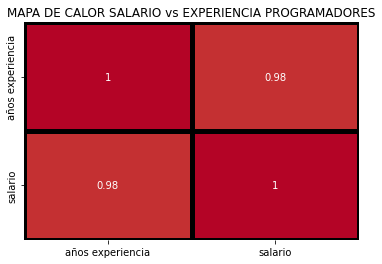

In [19]:
#Graficando el coeficiente
sns.heatmap(df.corr(), annot= True, cmap='coolwarm', linewidths=5, linecolor='black', vmin=0.5,vmax=1,cbar=False);
plt.title('MAPA DE CALOR SALARIO vs EXPERIENCIA PROGRAMADORES')
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/heatmap.jpg')

* La covarianza, que es la medida del grado en que una variable varía de acuerdo con otra (es decir magnitud y dirección similares).

In [20]:
# Calculo de la covarianza que es La covarianza nos mide la covariación conjunta de dos variables: Si es positiva nos dará la información de que a valores altos de una de las variable hay una mayor tendencia a encontrar valores altos de la otra variable y a valores bajos de una de las variable ,correspondientemente valores bajos.
df.cov()
#se influye que es positiva porque incrementa, ya que hay numeros positivos

,años experiencia,salario
años experiencia,8.053609,7.610630e+04
salario,76106.303448,7.515510e+08


* La varianza, se refiere al error de modelado que se produce debido a la elección de los datos de entrenamiento.

In [21]:
# Calculo de la varianza que es la forma de como entender los datos en su dispersión y variabilidad, es decir si los valores están alejados y desviados o no de la media, por que si está alejado de esta.
df['salario'].var()

751550960.4137931

* Se hace un resumen estadistico de la columna salarios, para ver todas variables estadisticas que tiene.

In [22]:
# Realización de un resumen estadístico deL salario de los programadores
df['salario'].describe()

count        30.000000
mean      76004.000000
std       27414.429785
min       37732.000000
25%       56721.750000
50%       65238.000000
75%      100545.750000
max      122392.000000
Name: salario, dtype: float64

4. Predicción

<p style="text-align: justify;">En este numeral, se desarrollará un modelo de Machine Learning, para saber proyecciones de los salarios en los programadores; cuya proyección, se utilizará el modelo de regresión lineal (Linear Regression), con la libreía de Sckit-Learn.</p>

<p style="text-align: justify;">En el siguiente cuadro de código, se importarán las librerías necesarias, para poner en marcha el modelo; así mismo, se definirán las variables necesarias, para modelar la información; teniendo en cuenta la variable X & Y. </p>

In [23]:

# modelo Regresión lineal con sckit learn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#se definen las variables a analizar y predecir
x = df['años experiencia'].values.reshape(-1, 1)
y = df['salario'].values.reshape(-1, 1)

#standarizar los valores de los ejes que se van analizar
sc_x = StandardScaler()
sc_y = StandardScaler()

#modelado de estandarización
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

#aplicacion y ejecucion del modelo
slr = LinearRegression()
slr.fit(x_std, y_std)

#nota: se debe analizar solo con variables numericas, mas no con variables categoricas, las cuales, deben estar 
#completamente limpias y organnizadas.


LinearRegression()

<p style="text-align: justify;">Se hará la gráfica de tipo de dispersión (Scatter) y trazar la linea de la regresión en color rojo, utilizando la librería Matplotlib.</p>

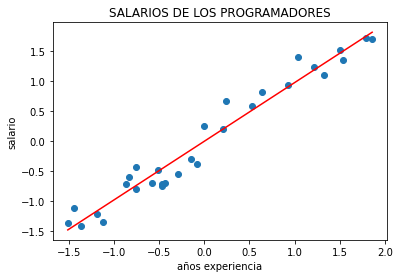

In [24]:
plt.scatter(x_std,y_std)

plt.plot(x_std,slr.predict(x_std), color='Red')

#..tener en cuenta que:
#x = df['años experiencia'].values.reshape(-1, 1)
#y = df['salario'].values.reshape(-1, 1)

plt.title("SALARIOS DE LOS PROGRAMADORES")
plt.xlabel("años experiencia")
plt.ylabel("salario")
#instrucción para guardar la imagen graficada en una carpeta del proyecto.
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/linear_regression.jpg')

5. Entrenamiento del modelo

<p style="text-align: justify;">La evaluación, consiste en saber que tan preciso es el modelo de regresión lineal utilizado, midiendolo con porcentaje.</p>

Se utiliza el metodo shape de Pandas, para describir el conjunto de datos en filas y columnas.

In [25]:
df.shape

(30, 2)

<p style="text-align: justify;">Se procede a dividir los datos en X y Y. Donde Y es la variable, por la cual el regresor trazará la linea recta de color rojo, desde el numero negativo al numero positivo.</p>



In [26]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

<p style="text-align: justify;">Se hace el testeo como: test_size = 1 / 3 test_size = 0.2 -> se divide el conjunto de datos en una proporción de 80% entrenamiento - 20% de prueba, que es una práctica común en el proceso de ciencia de datos.</p>

<p style="text-align: justify;">El parámetro random_state se utiliza para reordenar los datos, si se pasa el valor de 0 entonces todas y cada una de las veces en que lo ejecutamos tendremos un resultado consistente o estable.</p>

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Se procede con entrenar el algoritmo desde la variable independiente, es decir X.

In [28]:
X_train

array([[ 9.7],
       [ 4.1],
       [ 5.4],
       [ 8. ],
       [ 3. ],
       [ 5.2],
       [ 3.3],
       [ 4.6],
       [ 8.3],
       [ 6.9],
       [ 1.4],
       [10.6],
       [ 3.1],
       [ 2.3],
       [ 6. ],
       [ 6.1],
       [ 3.8],
       [ 3.3],
       [ 9.1],
       [ 2.1],
       [ 1.2],
       [ 7.2],
       [ 5. ],
       [ 4.1]])

* El algoritmo de Machine Learning declarado para hacer los entrenamientos (Train) y las pruebas (Test) declarandolo como un regresor, para predecir una variable de respuesta.

In [29]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

* Se procede a hacer la gráfica con Predict (X_train), para predecir con los datos de entrenamiento.

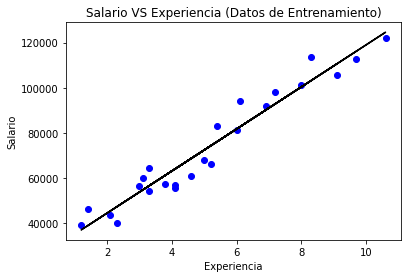

<Figure size 432x288 with 0 Axes>

In [36]:

plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salario VS Experiencia (Datos de Entrenamiento)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/linear_regression_train.png')

* Se procede a hacer la gráfica con Predict (X_train), para predecir con los datos de prueba.

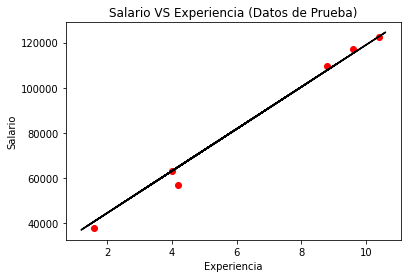

<Figure size 432x288 with 0 Axes>

In [31]:

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Salario VS Experiencia (Datos de Prueba)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()
plt.savefig('C:/Users/wagne/Downloads/Analisis salarios programadores/reports/linear_regression_test.jpg')

* Se procede hacer un consolidado general de gráficos para poder observar el analisis de forma minuciosa.

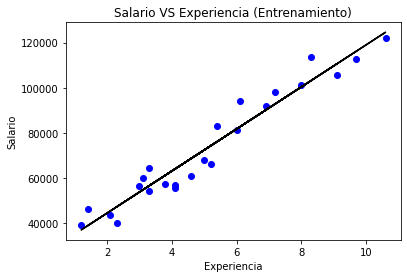

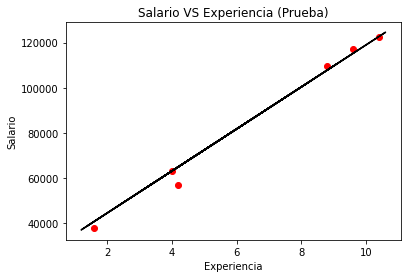

Text(0, 0.5, 'salario')

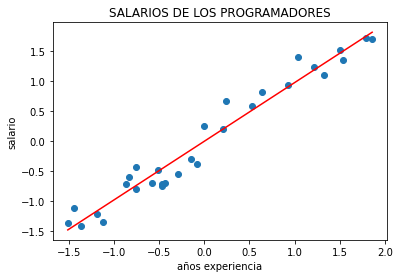

In [32]:
plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Salario VS Experiencia (Entrenamiento)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color='black')
plt.title('Salario VS Experiencia (Prueba)')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

plt.scatter(x_std,y_std)

plt.plot(x_std,slr.predict(x_std), color='Red')

#..tener en cuenta que:
#x = df_rrss['Numero_Usuarios'].values.reshape(-1, 1)
#y = df_rrss['Año_Creación'].values.reshape(-1, 1)

plt.title("SALARIOS DE LOS PROGRAMADORES")
plt.xlabel("años experiencia")
plt.ylabel("salario")

6. Evaluación del proyecto

La librería de Sckit-Learn, tiene el metodo .score para evaluar los datos de entrenamiento y prueba, desglosandolo en la siguiente linea de codigo:

In [33]:
#calcular el nivel de precisión del modelo
regressor.score(X_test, Y_test)

0.988169515729126

Se procede con crear una forma de que se pueda mostrar y entender el valor anterior, que está en decimales a valor porcentual:

In [34]:
#formula para convertirlo en porcentaje
porcentaje=regressor.score(X_test, Y_test)*100
print("El porcentaje de precisión del modelo es:" , porcentaje, "%")

El porcentaje de precisión del modelo es: 98.8169515729126 %


## 2-Conclusiones del proyecto

Las conclusiones del analisis de los datos fueron:

- El modelo de regresión lineal, solo se pueden utilizar datos numericos, más categóricos, por lo cual deben ser continuos.

- Para el caso, la regresión tiene una tendencia positiva, es decir va en aumento; como se puede observar, la linea en el plano cartesiano sale desde el dato negativo hasta el positivo.

- Se evalúa el modelo de regresión, teniendo una precisión del 98 %, ya que los datros fueron pulidos antes de su analisis y puesta en marcha este algoritmo de Machine Learning.

- A medida que el programador tiene más años de experiencia, el salario sube proporcionalmente.

## 3-Referencias bibliográficas

Estadística en Python: media, mediana, varianza, percentiles (Parte III). (2017, 4 noviembre). Adrianistán. https://blog.adrianistan.eu/estadistica-python-media-mediana-varianza-percentiles-parte-iii

Admin, A. (2021, 20 julio). Hacer un histograma en Python. App Game Tutoriales. Recuperado 12 de diciembre de 2022, de https://appgametutoriales.com/hacer-un-histograma-en-python/

Briega, L. R. E. (2016, 13 marzo). Análisis de datos cuantitativos con Python. https://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/

Bruce, A., Bruce, A., & Gedeck, P. (2020). Practical Statistics for Data Scientists: 50+ Essential Concepts Using R and Python. O’Reilly.

Platzi: Cursos online profesionales de tecnología. (s. f.-b). https://platzi.com/clases/2739-regresion-lineal/46173-tu-primera-regresion-lineal-con-scikit-learn/

McKinney, W. (2013). Python for Data Analysis. Van Duuren Media.

Vanderplas, J., & VanderPlas, J. (2016). Python Data Science Handbook: Essential Tools for Working with Data. Van Duuren Media.

Roldán, R. C., Martín, E. M., & Rodríguez, A. R. (2019). Big data con Python: recolección, almacenamiento y proceso. Alfaomega.

Géron, A. (2019). Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Unsupervised learning techniques. Van Duuren Media.

Torres, A. (2021, 9 diciembre). Limpieza de datos en Pandas: Explicado con ejemplos. freeCodeCamp.org. https://www.freecodecamp.org/espanol/news/limpieza-de-datos-en-pandas-explicado-con-ejemplos/

Análisis exploratorio de datos. (2021, 3 agosto). https://www.ibm.com/es-es/cloud/learn/exploratory-data-analysis

Wilke, C. O. (2019). Fundamentals of Data Visualization: A Primer on Making Informative and Compelling Figures (1.). O’Reilly Media.

De TechTarget, C. (2021, 22 abril). Análisis estadístico. ComputerWeekly.es. https://www.computerweekly.com/es/definicion/Analisis-estadistico
